# **CRM Analysis**

Customer Relationship Management (CRM) analysis involves the systematic examination and interpretation of data related to interactions between a business and its customers. Through CRM analysis, companies evaluate customer behavior, preferences, and feedback to gain valuable insights into their needs and expectations.

## Dataset Description

- **InvoiceNo:** Invoice number that consists 6 digits. If this code starts with letter 'c', it indicates a cancellation.

- **StockCode:** Product code that consists 5 digits.

- **Description:** Product name.

- **Quantity:** The quantities of each product per transaction.

- **InvoiceDate:** This represents the day and time when each transaction was generated.

- **UnitPrice:** Product price per unit.

- **CustomerID:** Customer number that consists 5 digits. Each customer has a unique customer ID.

- **Country:** Name of the country where each customer resides.

## Importing Libraries and Loading Datasets

In [ ]:
# importing required modules and packages
!pip install squarify

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import squarify as sq
import warnings
warnings.filterwarnings('ignore')

# Loading dataset
!gdown 1CmS-dDKvbTCGYlLBfUNGRi5StOP0GOLl

df = pd.read_csv('/content/Ecom_CRM_analysis.csv',encoding='latin1')

Downloading...
From: https://drive.google.com/uc?id=1CmS-dDKvbTCGYlLBfUNGRi5StOP0GOLl
To: /content/Ecom_CRM_analysis.csv
100% 45.6M/45.6M [00:00<00:00, 64.4MB/s]


## Preprocessing Dataset

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.shape

(541909, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:
df[['Quantity','UnitPrice']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0


In [ ]:
# changing data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['CustomerID'] = df['CustomerID'].astype(str).apply(lambda x: x[:-2])
df['Quantity'] = df['Quantity'].astype('int32')
df['UnitPrice'] = df['UnitPrice'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int32         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float32       
 6   CustomerID   541909 non-null  object        
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float32(1), int32(1), object(5)
memory usage: 28.9+ MB


In [ ]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4223
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4373
Country,38


In [ ]:
#checking duplicates
df.duplicated().sum()

5268

In [ ]:
#removing duplicates
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(536641, 8)

In [ ]:
#checking nulls
df.isna().sum().sum()

1454

In [ ]:
df.isna().sum()* 100 / len(df)

,0
InvoiceNo,0.000000
StockCode,0.000000
Description,0.270945
Quantity,0.000000
InvoiceDate,0.000000
UnitPrice,0.000000
CustomerID,0.000000
Country,0.000000


In [ ]:
# Handimg Nulls
mode_desc = df.groupby('StockCode')['Description'].apply(lambda x: x.mode()[0] if not x.mode().empty else 'NO DESCRIPTION')
df['Description'] = df['Description'].fillna(df['StockCode'].map(mode_desc))

In [ ]:
df.isna().sum().sum()

0

In [ ]:
df.nunique()

,0
InvoiceNo,25900
StockCode,4070
Description,4224
Quantity,722
InvoiceDate,23260
UnitPrice,1630
CustomerID,4373
Country,38


In [ ]:
df = df[df['UnitPrice'] != 0]

In [ ]:
df.shape

(534131, 8)

## Exploratory Data Analysis

In [ ]:
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.300000
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340001
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.000000
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340001
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.340001


In [ ]:
df['TotalPrice'].sum()/1000000

9.726006907034938

### Descriptive Statistics

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,TotalPrice
count,534131.000000,534131,534131.000000,534131.000000
mean,9.916784,2011-07-04 12:02:14.286607360,4.654426,18.209029
min,-80995.000000,2010-12-01 08:26:00,-11062.059570,-168469.593821
25%,1.000000,2011-03-28 11:36:00,1.250000,3.750000
50%,3.000000,2011-07-19 15:55:00,2.100000,9.900000
75%,10.000000,2011-10-18 17:10:00,4.130000,17.570000
max,80995.000000,2011-12-09 12:50:00,38970.000000,168469.593821
std,216.451709,NaN,97.414780,381.547566


In [ ]:
df.describe(include='object')

,InvoiceNo,StockCode,Description,CustomerID,Country
count,534131,534131,534131,534131,534131
unique,23798,3938,4042,4372,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,n,United Kingdom
freq,1114,2295,2353,132567,487808


- This data is from December 2010 to December 2011.
- There are 4371 customers accross 38 countries.
- *WHITE HANGING HEART T-LIGHT HOLDER* is the most purchased product

### Country wise analysis

In [ ]:
cust_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).reset_index()
cust_country

,Country,CustomerID
0,United Kingdom,3950
1,Germany,95
2,France,88
3,Spain,31
4,Belgium,25
5,Switzerland,22
6,Portugal,20
7,Italy,15
8,Finland,12
9,Austria,11


In [ ]:
cust_country[cust_country['Country']=='United Kingdom']['CustomerID']/cust_country['CustomerID'].sum()

,CustomerID
0,0.900182


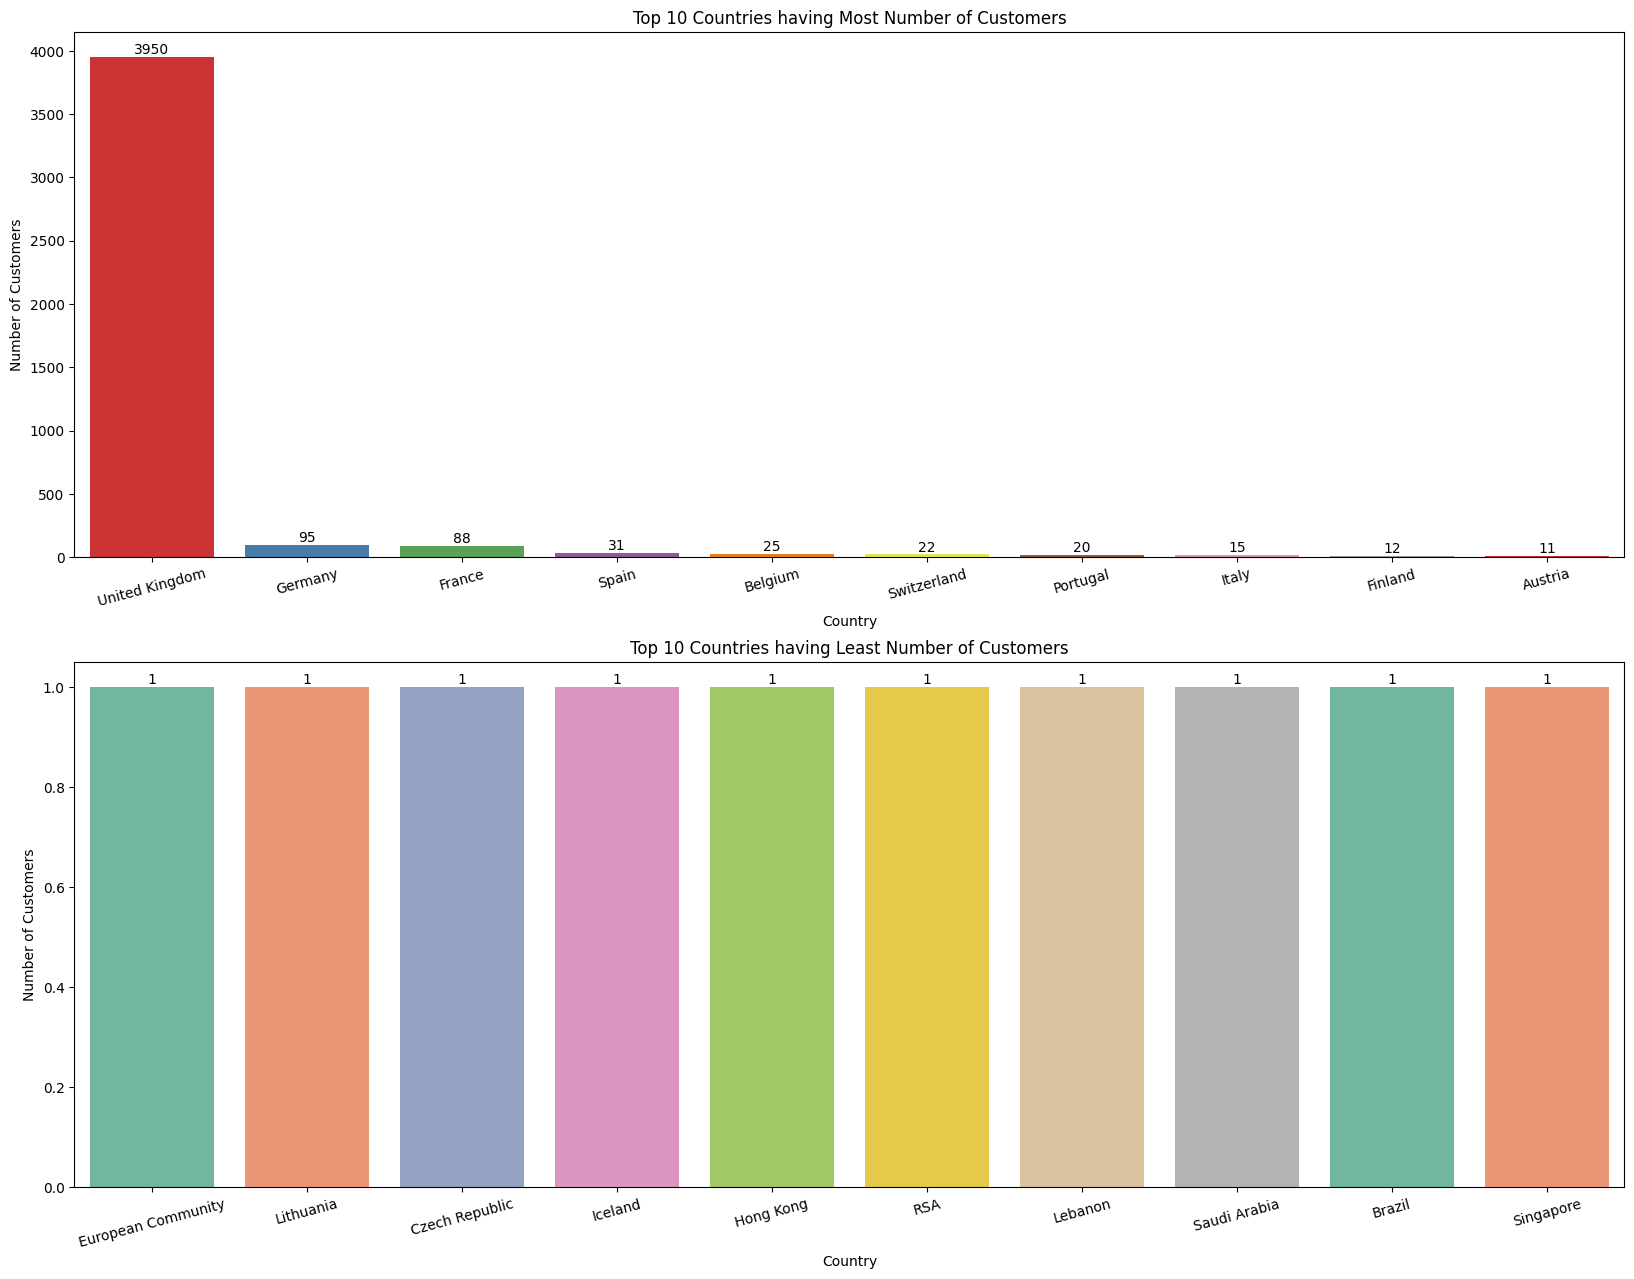

In [ ]:
fig = plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
plt.title('Top 10 Countries having Most Number of Customers')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
g = sns.barplot(data=cust_country.head(10), x='Country', y='CustomerID', palette='Set1')
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

plt.subplot(2,1,2)
plt.title('Top 10 Countries having Least Number of Customers')
plt.ylabel('Number of Customers')
plt.xticks(rotation=15)
g = sns.barplot(data=cust_country.tail(10)[::-1], x='Country', y='CustomerID', palette='Set2')
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

plt.show()

- Almost 90% of the customers i.e., 3950 are from United Kingdom that means this store is in United Kingdom and the customers from various countries who came to visit UK also shopped in this.

In [ ]:
orders_country = df.groupby('Country')['InvoiceNo'].nunique().sort_values(ascending=False).reset_index()
orders_country

,Country,InvoiceNo
0,United Kingdom,21393
1,Germany,603
2,France,461
3,EIRE,360
4,Belgium,119
5,Spain,105
6,Netherlands,100
7,Switzerland,74
8,Portugal,71
9,Australia,69


In [ ]:
orders_country['InvoiceNo'].sum()

23798

In [ ]:
orders_country[orders_country['Country']=='United Kingdom']['InvoiceNo']/orders_country['InvoiceNo'].sum()

,InvoiceNo
0,0.898941


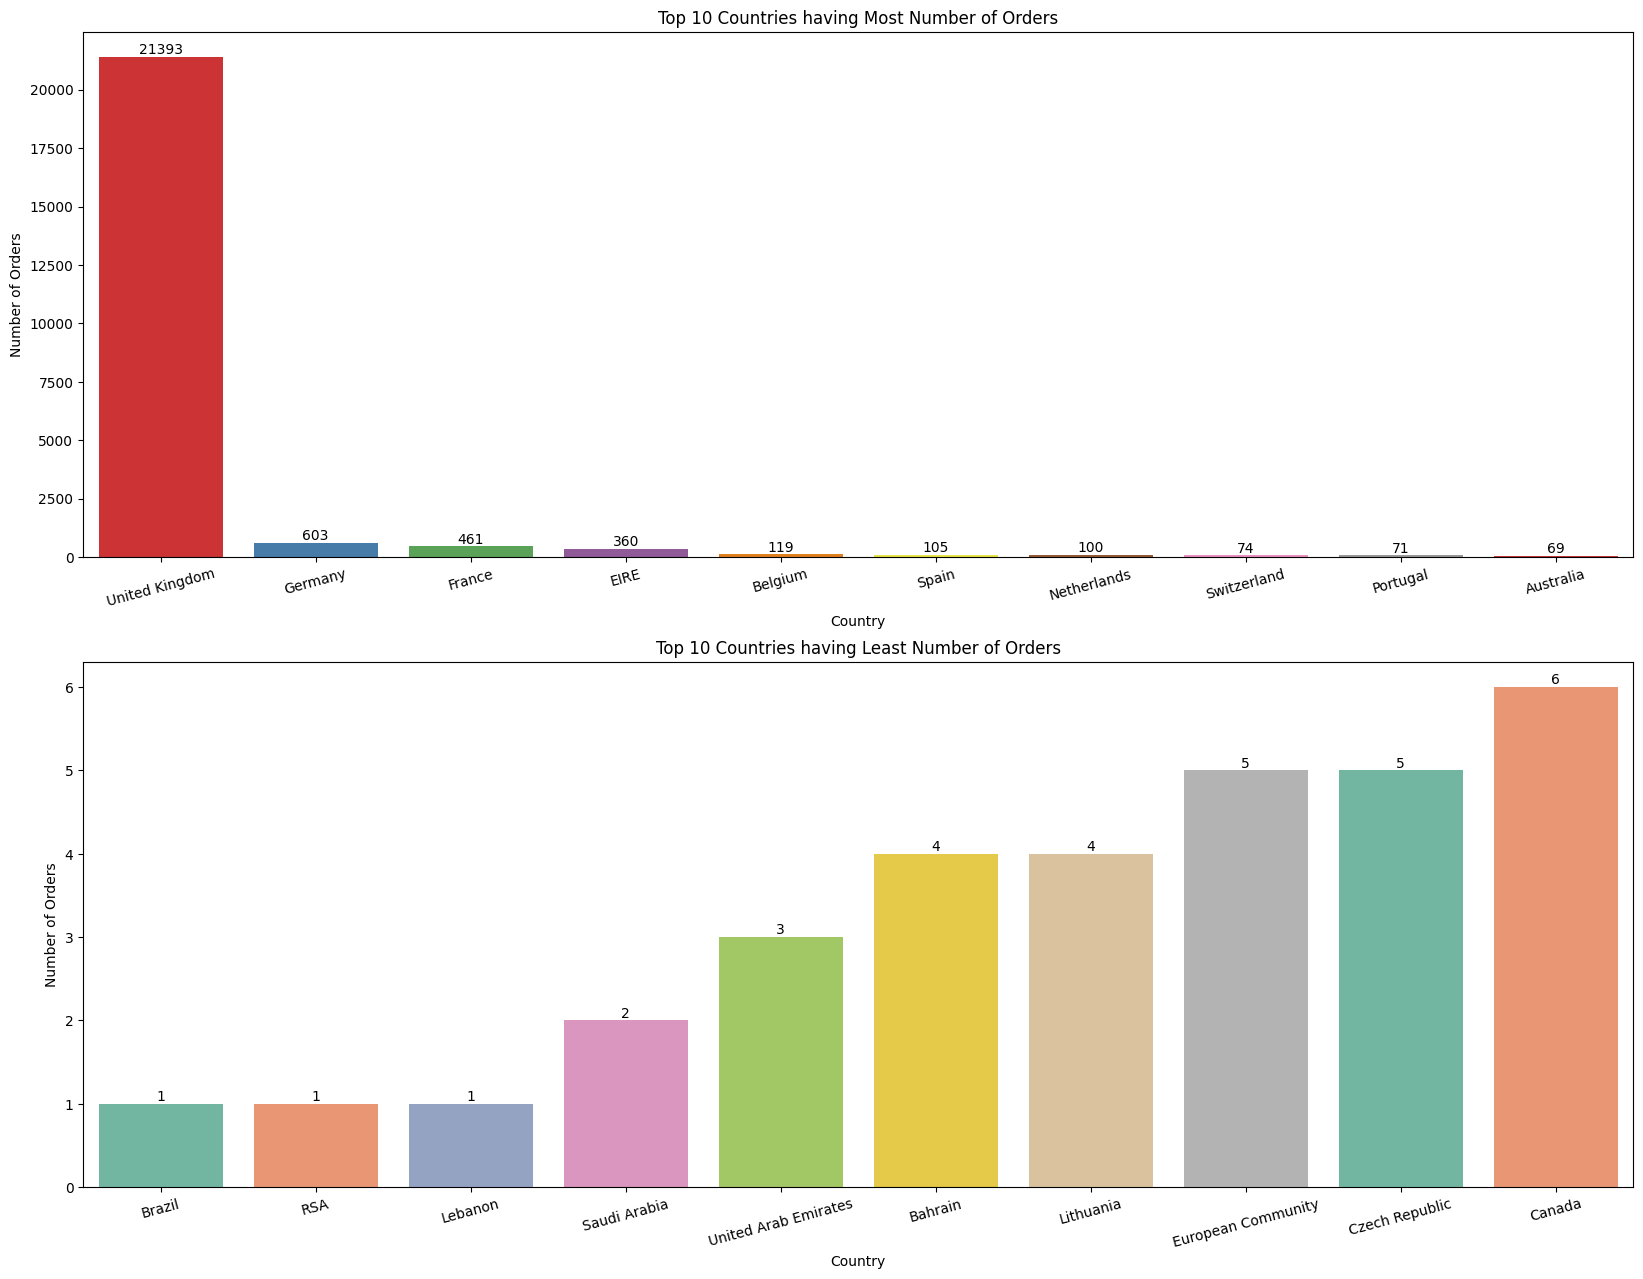

In [ ]:
fig = plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
plt.title('Top 10 Countries having Most Number of Orders')
plt.ylabel('Number of Orders')
plt.xticks(rotation=15)
g = sns.barplot(data=orders_country.head(10), x='Country', y='InvoiceNo', palette='Set1')
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

plt.subplot(2,1,2)
plt.title('Top 10 Countries having Least Number of Orders')
plt.ylabel('Number of Orders')
plt.xticks(rotation=15)
g = sns.barplot(data=orders_country.tail(10)[::-1], x='Country', y='InvoiceNo', palette='Set2')
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

plt.show()

- 23798 orders are made in this store and 90% are from UK.

In [ ]:
sales_country = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
sales_country

,Country,TotalPrice
0,United Kingdom,8.167128e+06
1,Netherlands,2.846615e+05
2,EIRE,2.629934e+05
3,Germany,2.215095e+05
4,France,1.973171e+05
5,Australia,1.370098e+05
6,Switzerland,5.636305e+04
7,Spain,5.475603e+04
8,Belgium,4.091096e+04
9,Sweden,3.658541e+04


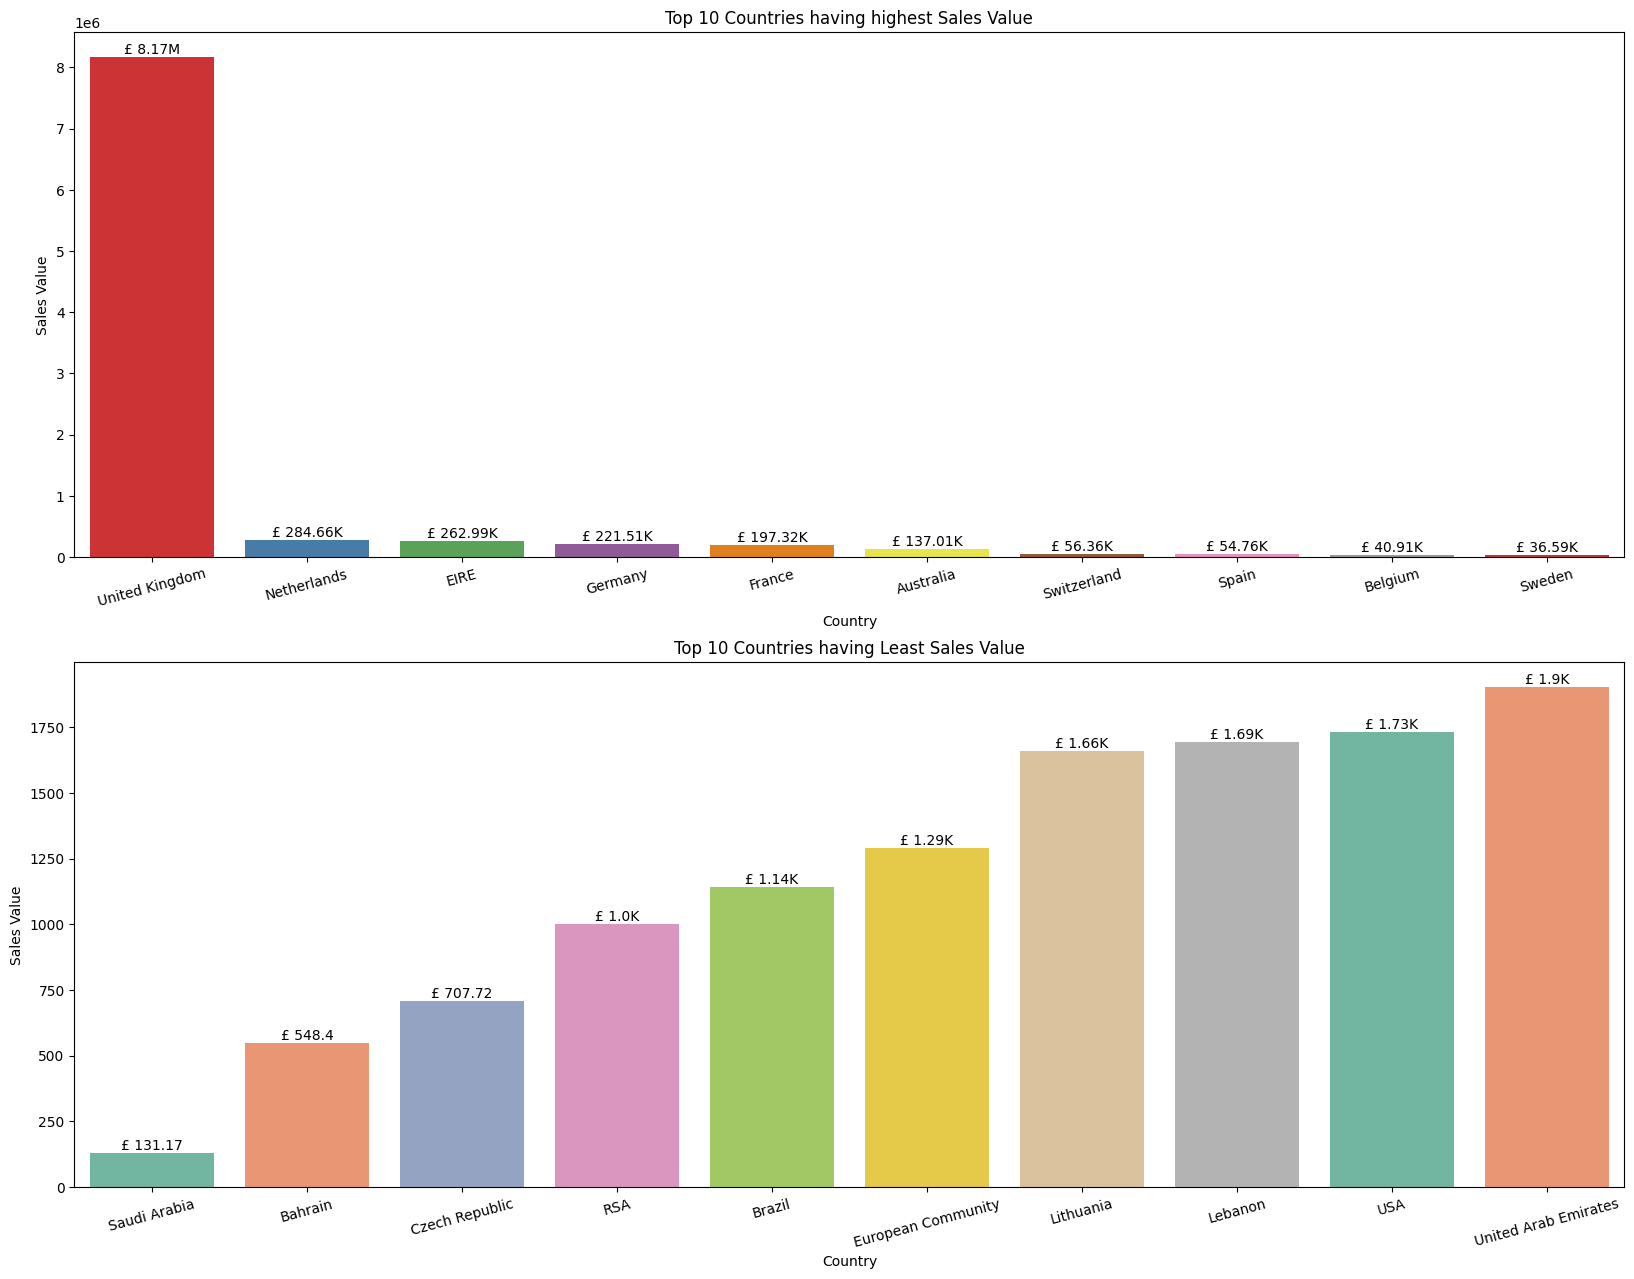

In [ ]:
fig = plt.figure(figsize = (20,15))

plt.subplot(2,1,1)
plt.title('Top 10 Countries having highest Sales Value')
plt.ylabel('Sales Value')
plt.xticks(rotation=15)
g = sns.barplot(data=sales_country.head(10), x='Country', y='TotalPrice', palette='Set1')
for j in g.patches:
  v,l = j.get_height(), len(str(int(j.get_height())))
  if l < 7:
    v = str((v/1000).round(2))+'K'
  else:
    v = str((v/1000000).round(2))+'M'
  plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s='£ '+v, ha='center', va='bottom')

plt.subplot(2,1,2)
plt.title('Top 10 Countries having Least Sales Value')
plt.ylabel('Sales Value')
plt.xticks(rotation=15)
g = sns.barplot(data=sales_country.tail(10)[::-1], x='Country', y='TotalPrice', palette='Set2')
for j in g.patches:
  v,l = j.get_height(), len(str(int(j.get_height())))
  if l < 4:
    v = str(v.round(2))
  else:
    v = str((v/1000).round(2))+'K'
  plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s='£ '+v, ha='center', va='bottom')

plt.show()

In [ ]:
(sales_country['TotalPrice'].sum()/1000000).round(2)

9.73

In [ ]:
sales_country[sales_country['Country']=='United Kingdom']['TotalPrice']/sales_country['TotalPrice'].sum()

,TotalPrice
0,0.839721


- Total Sales of the store is £ 9.73M out of which £ 8.17M i.e., 84% is from UK, followed by Netherlands with £ 284.6K

### Product Analysis

In [ ]:
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index()
top_products.head(30)

,Description,Quantity
0,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53751
1,JUMBO BAG RED RETROSPOT,47256
2,POPCORN HOLDER,36322
3,ASSORTED COLOUR BIRD ORNAMENT,36282
4,PACK OF 72 RETROSPOT CAKE CASES,36016
5,WHITE HANGING HEART T-LIGHT HOLDER,35294
6,RABBIT NIGHT LIGHT,30631
7,MINI PAINT SET VINTAGE,26437
8,PACK OF 12 LONDON TISSUES,26095
9,PACK OF 60 PINK PAISLEY CAKE CASES,24719


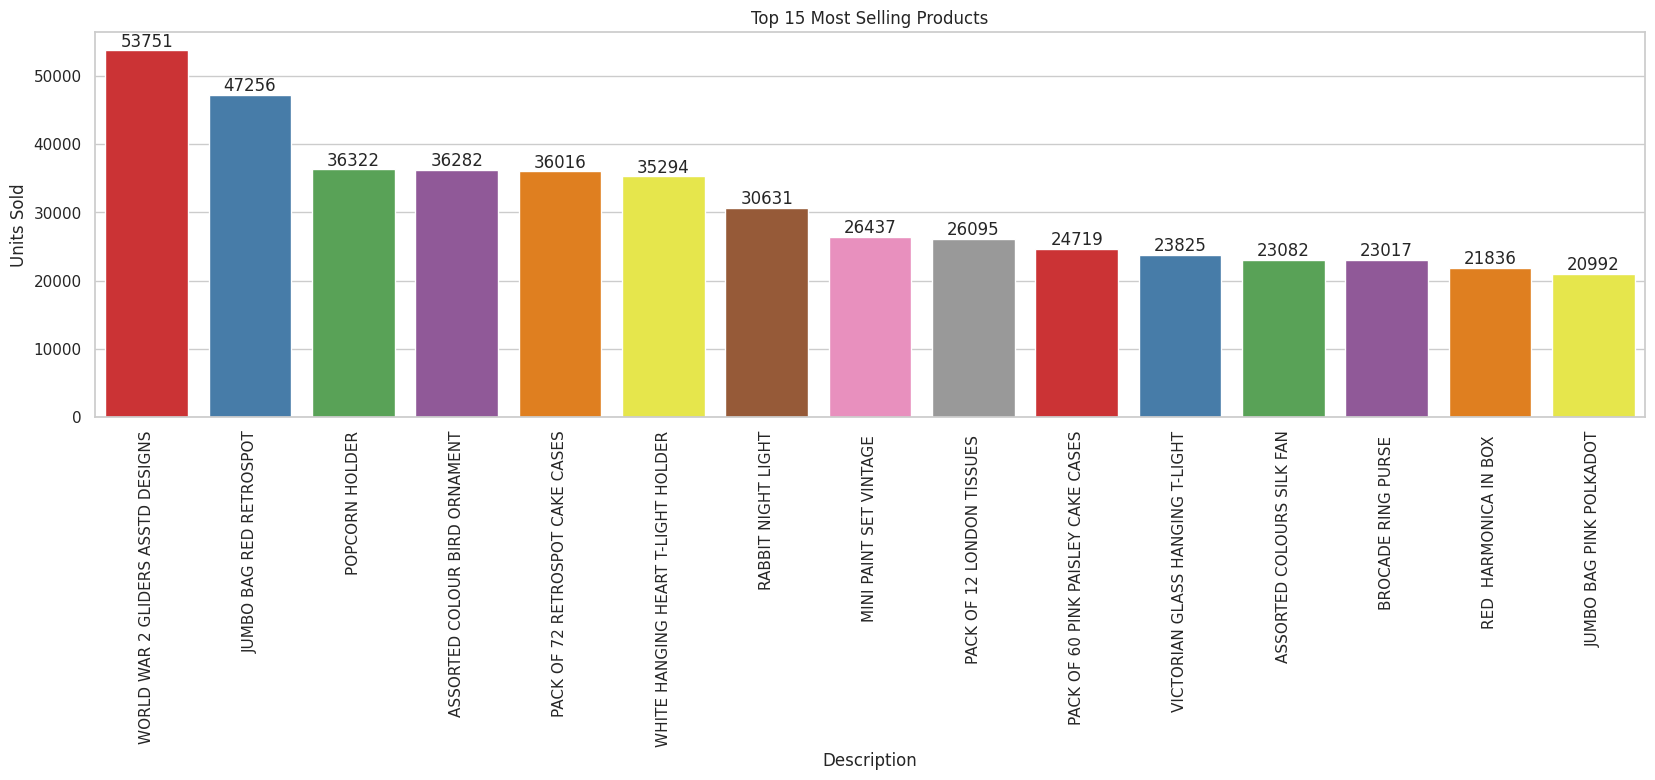

In [ ]:
fig = plt.figure(figsize = (20,5))

plt.title('Top 15 Most Selling Products')
plt.ylabel('Units Sold')
plt.xticks(rotation=90)
g = sns.barplot(data=top_products.head(15), x='Description', y='Quantity', palette='Set1')
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

- *WORLD WAR 2 GLIDERS ASSTD DESIGNS* is the most selling product followed by *JUMBO BAG RED RETROSPOT* and *POPCORN HOLDER*

In [ ]:
cancelled_products = df[df['InvoiceNo'].str.contains('C')].groupby('Description')['Quantity'].sum().sort_values().reset_index()
cancelled_products = cancelled_products[~cancelled_products['Description'].isin(["Manual", "Discount"])].reset_index(drop=True)
cancelled_products.head(20)

,Description,Quantity
0,"PAPER CRAFT , LITTLE BIRDIE",-80995
1,MEDIUM CERAMIC TOP STORAGE JAR,-74494
2,ROTATING SILVER ANGELS T-LIGHT HLDR,-9376
3,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3150
4,WHITE HANGING HEART T-LIGHT HOLDER,-2578
5,GIN + TONIC DIET METAL SIGN,-2030
6,HERB MARKER BASIL,-1527
7,FELTCRAFT DOLL MOLLY,-1447
8,TEA TIME PARTY BUNTING,-1424
9,PAPER POCKET TRAVELING FAN,-1385


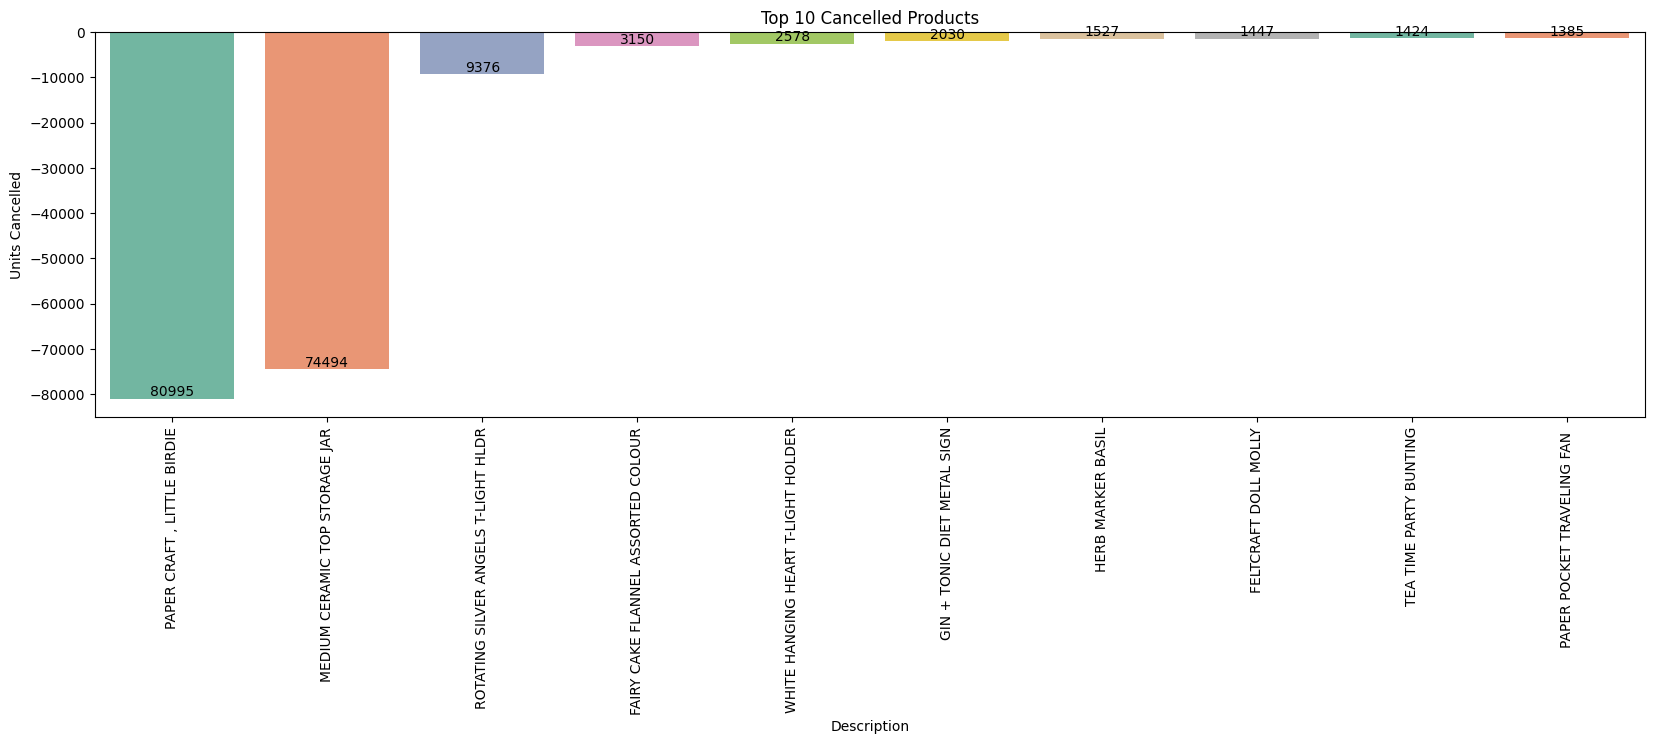

In [ ]:
fig = plt.figure(figsize = (20,5))

plt.title('Top 10 Cancelled Products')
plt.ylabel('Units Cancelled')
plt.xticks(rotation=90)
g = sns.barplot(data=cancelled_products.head(10), x='Description', y='Quantity', palette='Set2')
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()*-1), ha='center', va='bottom')

- *PAPER CRAFT , LITTLE BIRDIE* is the most cancelled product with almost 80K units got cancelled followed by *MEDIUM CERAMIC TOP STORAGE JAR*

### Time Series

In [ ]:
df_ts = df[['InvoiceDate','InvoiceNo']].copy()
df_ts['InvoiceDate'] = pd.to_datetime(df_ts['InvoiceDate'].dt.date, errors='coerce')
df_ts = df_ts.groupby('InvoiceDate')['InvoiceNo'].nunique().reset_index()
df_ts['InvoiceDay'] = df_ts['InvoiceDate'].dt.day
df_ts['InvoiceMonth'] = df_ts['InvoiceDate'].dt.month_name()
df_ts['WeekdayName'] = df_ts['InvoiceDate'].dt.day_name()
df_ts.head(10)

,InvoiceDate,InvoiceNo,InvoiceDay,InvoiceMonth,WeekdayName
0,2010-12-01,133,1,December,Wednesday
1,2010-12-02,165,2,December,Thursday
2,2010-12-03,75,3,December,Friday
3,2010-12-05,95,5,December,Sunday
4,2010-12-06,120,6,December,Monday
5,2010-12-07,102,7,December,Tuesday
6,2010-12-08,139,8,December,Wednesday
7,2010-12-09,141,9,December,Thursday
8,2010-12-10,84,10,December,Friday
9,2010-12-12,51,12,December,Sunday


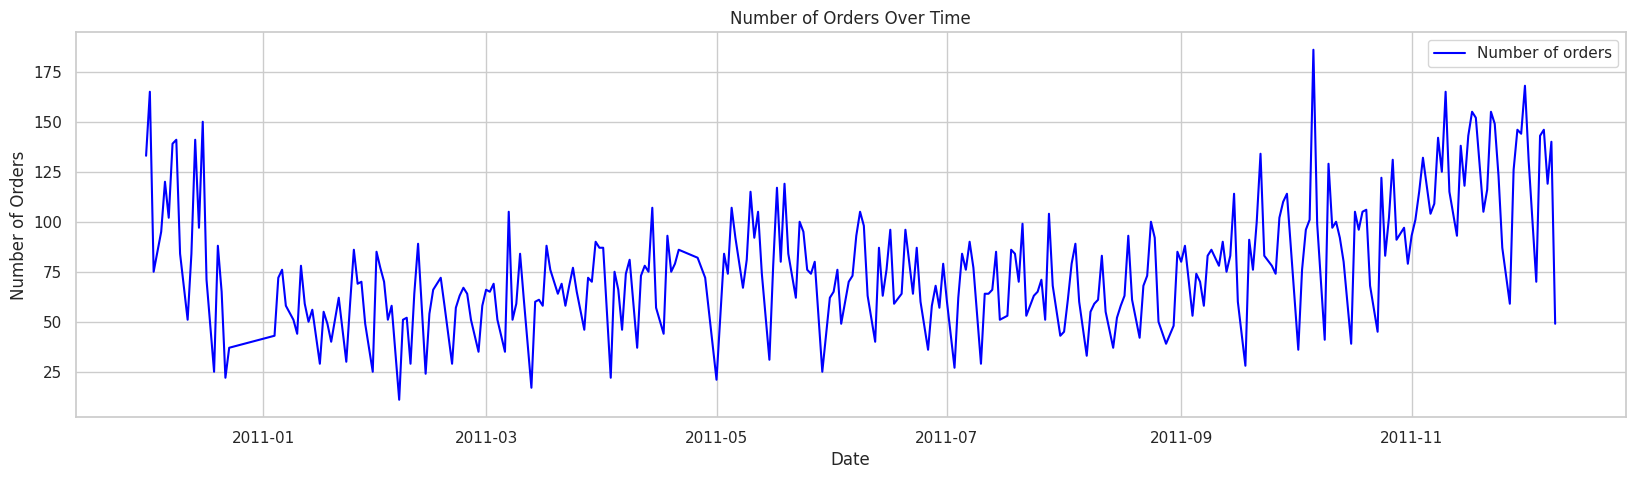

In [ ]:
fig = plt.figure(figsize = (20,5))
sns.set(style="whitegrid")
sns.lineplot(data=df_ts, x='InvoiceDate', y='InvoiceNo', label='Number of orders', color='blue')
plt.title('Number of Orders Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

Purchase Trend:
- Peaks in December (holiday shopping season).
- Dips in early months after the holiday rush.
- Steady fluctuations mid-year (April–August).
- Pre-holiday growth (September–November).

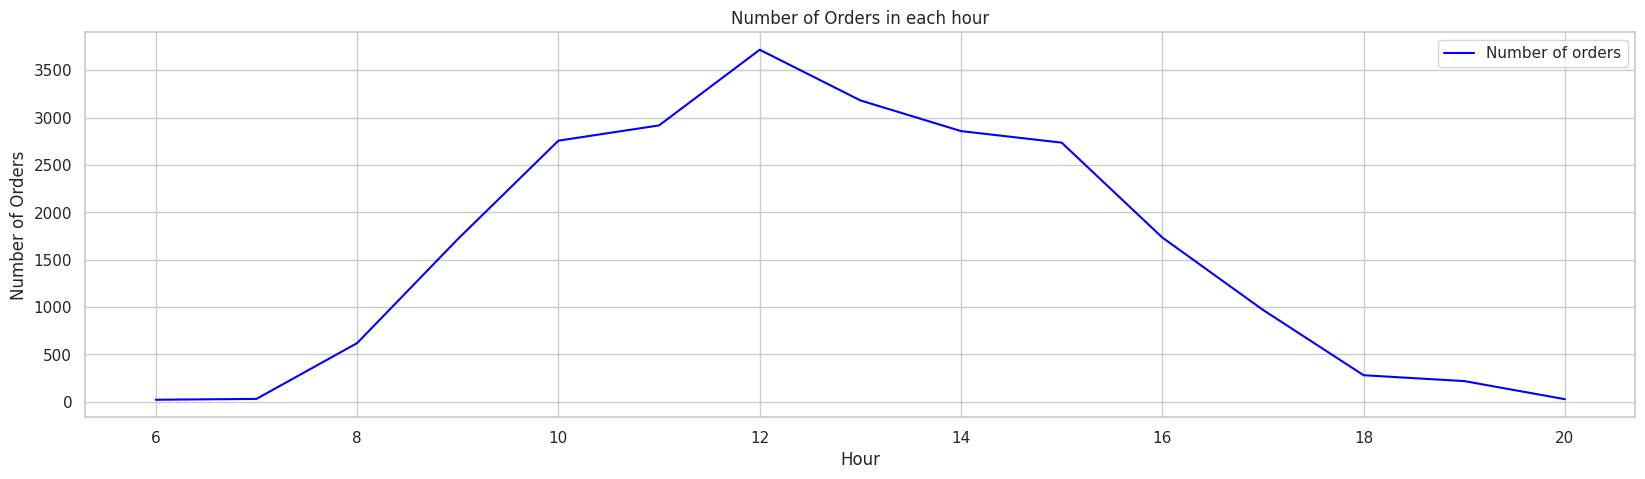

In [ ]:
hs = df.groupby(df['InvoiceDate'].dt.hour)['InvoiceNo'].nunique().reset_index()

fig = plt.figure(figsize = (20,5))
sns.set(style="whitegrid")
sns.lineplot(data=hs, x='InvoiceDate', y='InvoiceNo', label='Number of orders', color='blue')
plt.title('Number of Orders in each hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

- Most of the sales are happening between 9 to 4 peaks at 12 noon.

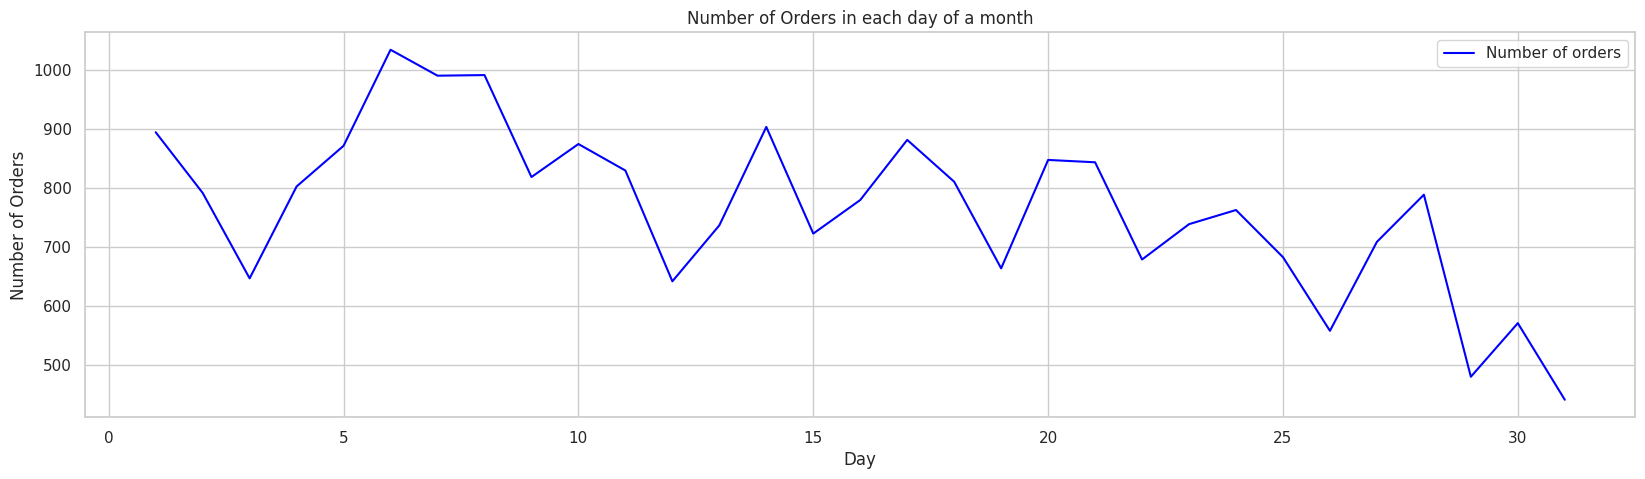

In [ ]:
ds = df_ts.groupby('InvoiceDay')['InvoiceNo'].sum().reset_index()
fig = plt.figure(figsize = (20,5))
sns.set(style="whitegrid")
sns.lineplot(data=ds, x='InvoiceDay', y='InvoiceNo', label='Number of orders', color='blue')
plt.title('Number of Orders in each day of a month')
plt.xlabel('Day')
plt.ylabel('Number of Orders')
plt.show()

- Sales are high till starting 8 days of the month, decent during middle days and are low during last days.

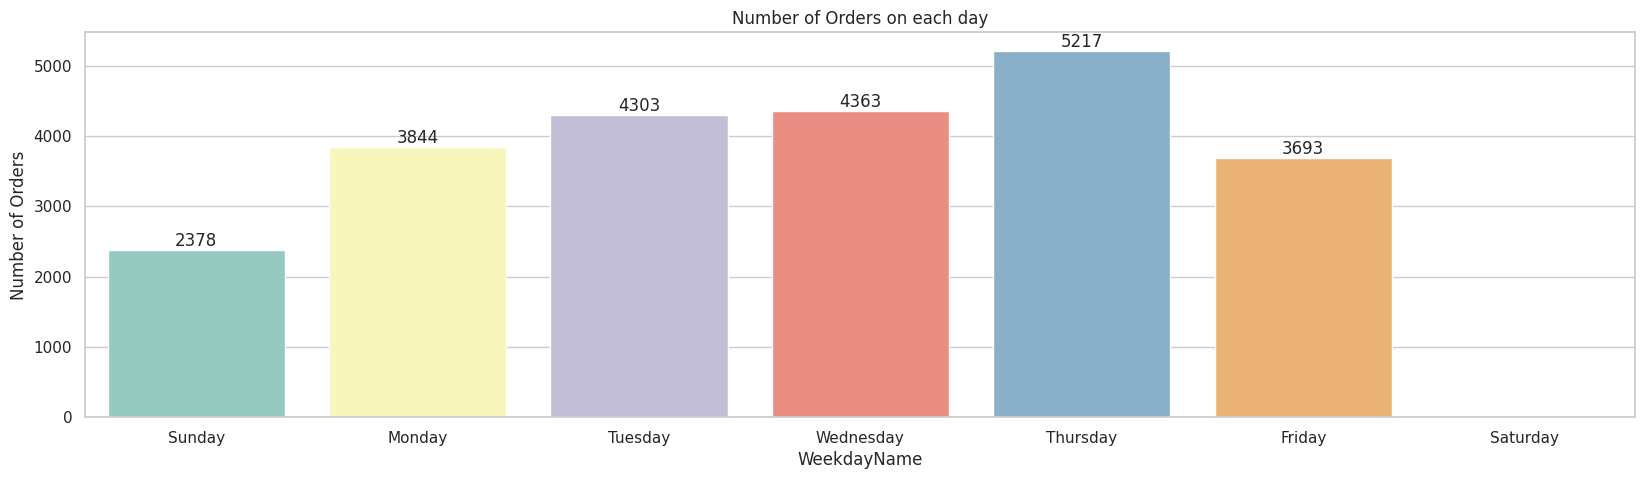

In [ ]:
ws = df_ts.groupby('WeekdayName')['InvoiceNo'].sum().reset_index()
order = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
fig = plt.figure(figsize = (20,5))
g = sns.barplot(data=ws, x='WeekdayName', y='InvoiceNo', palette='Set3', order=order)
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')
plt.title('Number of Orders on each day')
plt.ylabel('Number of Orders')
plt.show()

- Most of the sales are happening on Thursday followed by Wednesday and Tuesday.
- There are no sales on Saturdays which means that Saturday is a holiday for the shop.

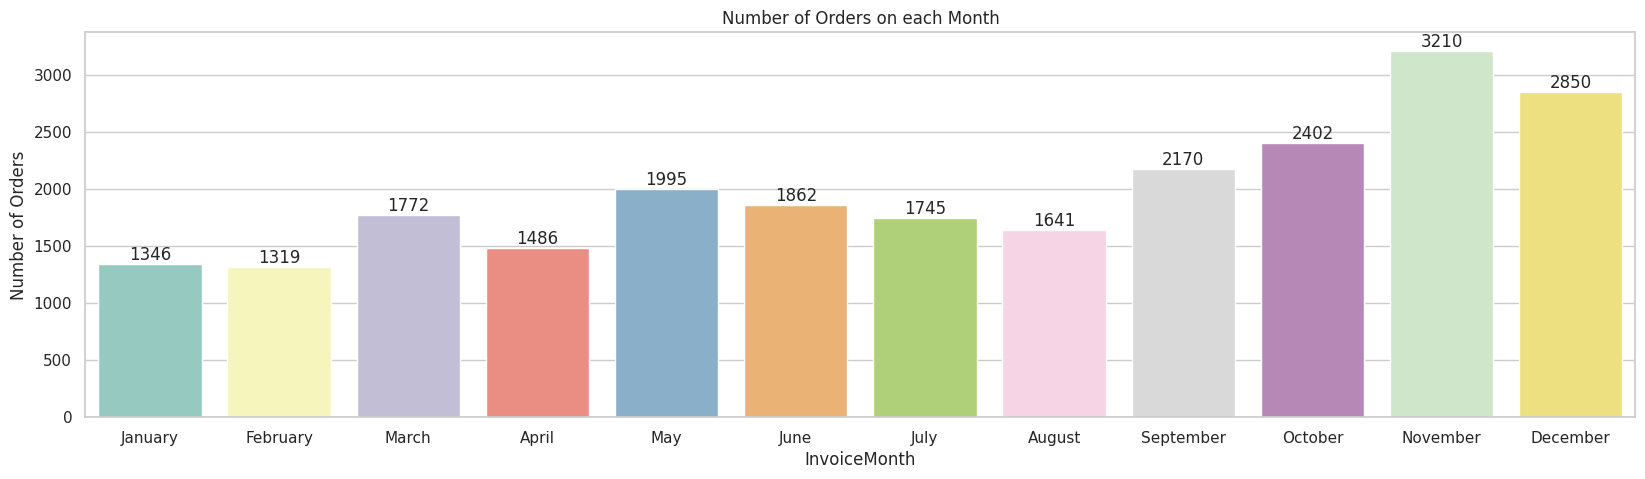

In [ ]:
ms = df_ts.groupby('InvoiceMonth')['InvoiceNo'].sum().reset_index()
order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

fig = plt.figure(figsize = (20,5))
g = sns.barplot(data=ms, x='InvoiceMonth', y='InvoiceNo', palette='Set3', order=order)
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')
plt.title('Number of Orders on each Month')
plt.ylabel('Number of Orders')
plt.show()

- Most of the sales are happening on November month followed by December and October

### Customer Analysis

In [ ]:
cust_df = df[df['CustomerID']!='n']

In [ ]:
orders_cust = cust_df.groupby('CustomerID')['InvoiceNo'].nunique().sort_values(ascending=False).reset_index()
orders_cust

,CustomerID,InvoiceNo
0,14911,248
1,12748,223
2,17841,169
3,14606,128
4,13089,118
...,...,...
4366,13441,1
4367,13449,1
4368,15744,1
4369,14518,1


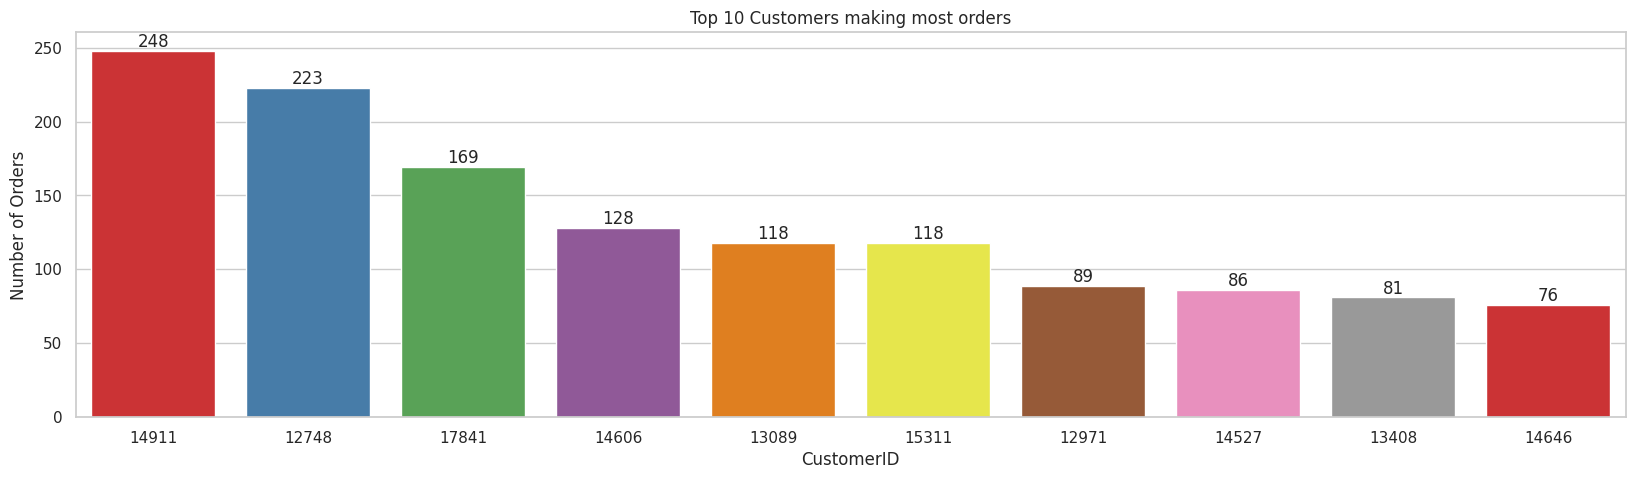

In [ ]:
fig = plt.figure(figsize = (20,5))

plt.title('Top 10 Customers making most orders')
plt.ylabel('Number of Orders')
g = sns.barplot(data=orders_cust.head(10), x='CustomerID', y='InvoiceNo', palette='Set1')
for j in g.patches:
   plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

plt.show()

- Customer 14911 made most number of purchases followed by 12748 and 17841

In [ ]:
sales_cust = cust_df.groupby('CustomerID')['TotalPrice'].sum().sort_values(ascending=False).reset_index()
sales_cust

,CustomerID,TotalPrice
0,14646,279489.019443
1,18102,256438.488361
2,17450,187322.170972
3,14911,132458.729279
4,12415,123725.450123
...,...,...
4366,12503,-1126.000000
4367,17603,-1165.300008
4368,14213,-1192.199991
4369,15369,-1592.489990


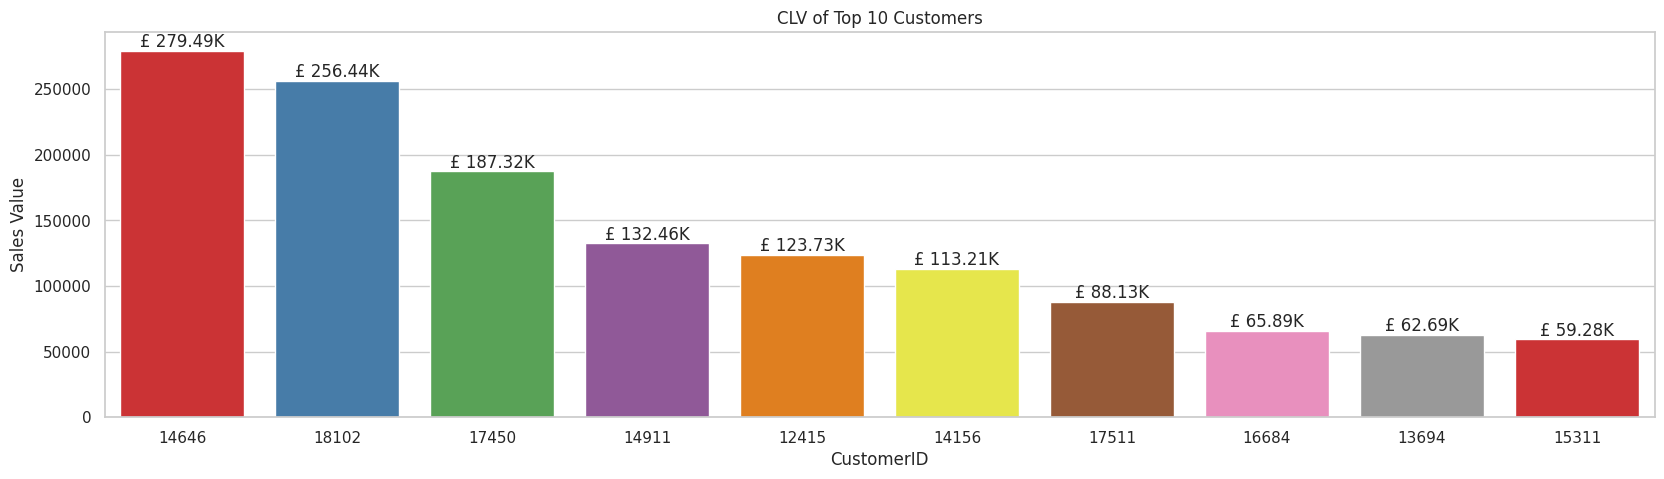

In [ ]:
fig = plt.figure(figsize = (20,5))

plt.title('CLV of Top 10 Customers')
plt.ylabel('Sales Value')
g = sns.barplot(data=sales_cust.head(10), x='CustomerID', y='TotalPrice', palette='Set1')
for j in g.patches:
  plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s='£ '+ str((j.get_height()/1000).round(2))+'K', ha='center', va='bottom')

plt.show()

- Customer 14646 has high CLV with £ 280K followed by 18102 with £ 256K and 17450 with £ 187K.

#### Customer Segmentation - RFM Analysis

In [ ]:
cust_df['InvoiceDate'] = pd.to_datetime(cust_df['InvoiceDate'].dt.date)
today = cust_df['InvoiceDate'].max()
df_rfm = cust_df.groupby('CustomerID').agg({'InvoiceDate': lambda x: (today - x.max()).days,
                                            'InvoiceNo': lambda x: len(x),
                                            'TotalPrice': lambda x: x.sum()}).reset_index()
df_rfm.columns = ['CustomerID','Recency', 'Frequency', 'Monetary']
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346,325,2,0.000000
1,12347,2,182,4309.999988
2,12348,75,31,1797.239997
3,12349,18,73,1757.549994
4,12350,310,17,334.399997


In [ ]:
df_rfm['Recency_Score'] = pd.qcut(df_rfm['Recency'], 5, labels = [5, 4, 3, 2, 1])
df_rfm['Frequency_Score'] = pd.qcut(df_rfm['Frequency'].rank(method = 'first'), 5, labels = [1, 2, 3, 4, 5])
df_rfm['Monetary_Score'] = pd.qcut(df_rfm['Monetary'], 5, labels = [1, 2, 3, 4, 5])
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score
0,12346,325,2,0.000000,1,1,1
1,12347,2,182,4309.999988,5,5,5
2,12348,75,31,1797.239997,2,3,4
3,12349,18,73,1757.549994,4,4,4
4,12350,310,17,334.399997,1,2,2


In [ ]:
df_rfm['RFM_Score'] = df_rfm['Recency_Score'].astype(str) + df_rfm['Frequency_Score'].astype(str) + df_rfm['Monetary_Score'].astype(str)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score
0,12346,325,2,0.000000,1,1,1,111
1,12347,2,182,4309.999988,5,5,5,555
2,12348,75,31,1797.239997,2,3,4,234
3,12349,18,73,1757.549994,4,4,4,444
4,12350,310,17,334.399997,1,2,2,122


In [ ]:
def segment_customer(row):
    # Champions: Recent, frequent, and high spenders
    if row['RFM_Score'] == '555':
        return 'Champions'
    # Lost Customers: Lowest scores across all dimensions
    elif row['RFM_Score'] == '111':
        return 'Lost Customers'
    # Hibernating: Low recency, frequency, and monetary
    elif row['Recency_Score'] in [1, 2] and row['Frequency_Score'] in [1, 2, 3]:
        return 'Hibernating'
    # About to Sleep: Low engagement with medium recency
    elif row['Recency_Score'] == 3 and row['Frequency_Score'] <= 2:
        return 'About to Sleep'
    # Needs Attention: Medium engagement needing intervention
    elif row['Recency_Score'] in [2, 3] and row['Frequency_Score'] == 3:
        return 'Needs Attention'
    # Can't Lose Them: Loyal customers at risk of churning
    elif row['Recency_Score'] in [1, 2, 3] and row['Frequency_Score'] in [4, 5]:
        return "Can't Lose Them"
    # Loyal Customers: Bread-and-butter customers
    elif row['Recency_Score'] >= 4 and row['Frequency_Score'] >= 4 and row['Monetary_Score'] >= 4:
        return 'Loyal Customers'
    # Recent Users: High recency but not yet fully loyal
    elif row['Recency_Score'] in [4, 5] and row['Frequency_Score'] <= 2:
        return 'New Customers'
    # Potential Loyalists: High recency with moderate frequency or low monetary scores
    elif row['Recency_Score'] in [4, 5] and (row['Frequency_Score'] in [3, 4] or row['Monetary_Score'] in [1, 2, 3]):
        return 'Potential Loyalists'
    else:
        return 'Unclassified'

In [ ]:
df_rfm['Segment'] = df_rfm.apply(segment_customer, axis=1)
df_rfm.head()

,CustomerID,Recency,Frequency,Monetary,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,Segment
0,12346,325,2,0.000000,1,1,1,111,Lost Customers
1,12347,2,182,4309.999988,5,5,5,555,Champions
2,12348,75,31,1797.239997,2,3,4,234,Hibernating
3,12349,18,73,1757.549994,4,4,4,444,Loyal Customers
4,12350,310,17,334.399997,1,2,2,122,Hibernating


In [ ]:
segments = df_rfm['Segment'].value_counts().reset_index()
segments['Percentage'] = (segments['count'] / segments['count'].sum()).round(4) * 100
segments

,Segment,count,Percentage
0,Hibernating,1148,26.26
1,Can't Lose Them,652,14.92
2,Loyal Customers,609,13.93
3,Potential Loyalists,472,10.80
4,New Customers,358,8.19
5,About to Sleep,328,7.50
6,Champions,324,7.41
7,Lost Customers,273,6.25
8,Needs Attention,207,4.74


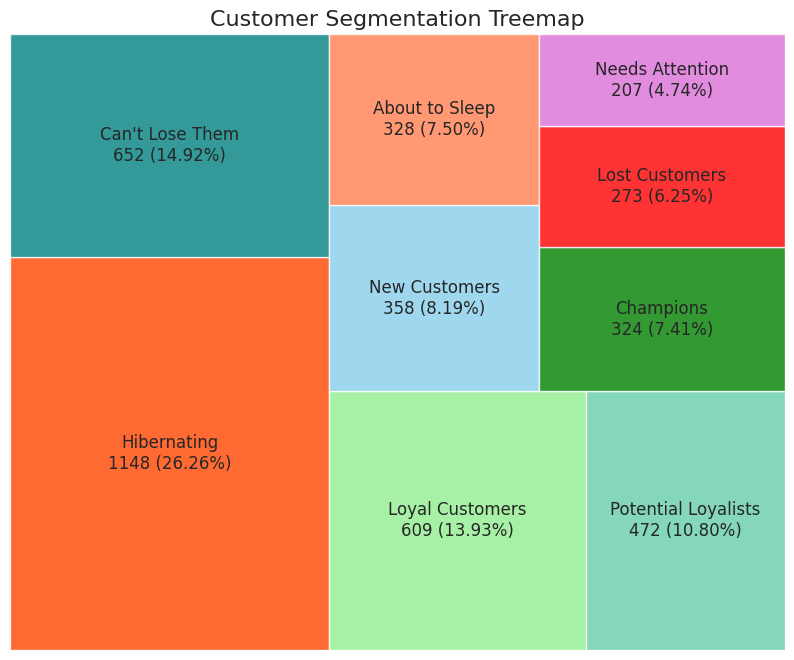

In [162]:
# Treemap
plt.figure(figsize=(10, 8))
plt.title('Customer Segmentation Treemap', fontsize=16)
plt.axis('off')

color_map = {
    'Champions': 'green',
    'Loyal Customers': 'lightgreen',
    'Potential Loyalists': 'mediumaquamarine',
    'New Customers': 'skyblue',
    "Can't Lose Them": 'teal',
    'Needs Attention': 'orchid',
    'Lost Customers': 'red',
    'Hibernating': 'orangered',
    'About to Sleep': 'coral'
}

colors = [color_map[row['Segment']] for _, row in segments.iterrows()]
labels = [f"{row['Segment']}\n{row['count']} ({row['Percentage']:.2f}%)" for _, row in segments.iterrows()]
sizes = segments['count']

sq.plot(sizes=sizes, label=labels, color=colors, alpha=0.8)

plt.show()

1. **Hibernating (26.26%, 1148 customers)**:
   - This is the largest segment, indicating a significant number of customers who haven't purchased recently.

2. **Can't Lose Them (14.92%, 652 customers)**:
   - These are high-value customers at risk of switching to competitors.

3. **Loyal Customers (13.93%, 609 customers)**:
   - These customers consistently purchase and are satisfied with the brand.

4. **Potential Loyalists (10.80%, 472 customers)**:
   - These are customers with the potential to become loyal buyers if nurtured correctly.

5. **New Customers (8.19%, 358 customers)**:
   - Customers who recently made their first purchase.

6. **About to Sleep (7.50%, 328 customers)**:
   - These are at risk of becoming inactive.

7. **Champions (7.41%, 324 customers)**:
   - Your best customers who buy frequently, spend the most, and promote your brand.

8. **Lost Customers (6.25%, 273 customers)**:
   - Customers who are no longer engaged with the brand.

9. **Needs Attention (4.74%, 207 customers)**:
   - These customers are showing declining engagement and could churn soon.

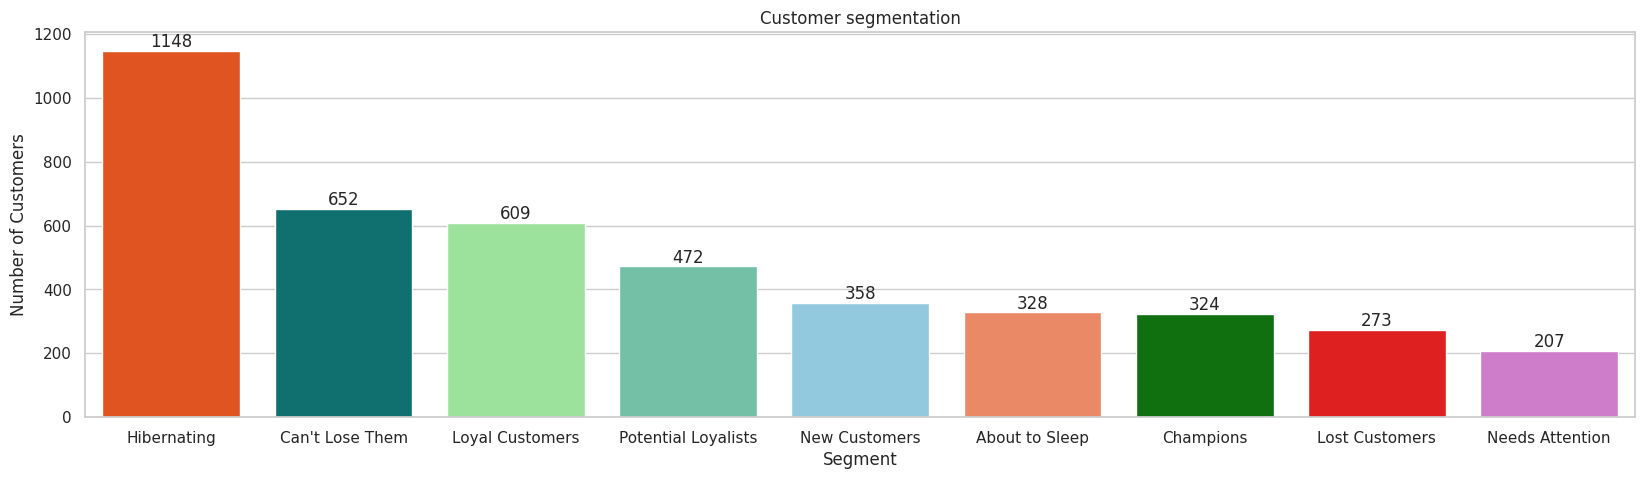

In [ ]:
fig = plt.figure(figsize = (20,5))

plt.title('Customer segmentation')
plt.ylabel('Number of Customers')
g = sns.barplot(data=segments, x='Segment', y='count', palette=color_map)
for j in g.patches:
  plt.text(x=j.get_x()+j.get_width()/2, y=j.get_height(), s=int(j.get_height()), ha='center', va='bottom')

plt.show()

#### Cohort Analysis

In [ ]:
cust_df['InvoiceDate'] = pd.to_datetime(cust_df['InvoiceDate'])
cust_df['CohortMonth'] = cust_df.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
cust_df['InvoiceMonth'] = cust_df['InvoiceDate'].dt.to_period('M')
cust_df['CohortIndex'] = (cust_df['InvoiceMonth'].dt.to_timestamp() - cust_df['CohortMonth'].dt.to_timestamp()).apply(lambda x: x.days // 30)
cust_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,CohortMonth,InvoiceMonth,CohortIndex
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom,15.300000,2010-12,2010-12,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom,20.340001,2010-12,2010-12,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom,22.000000,2010-12,2010-12,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom,20.340001,2010-12,2010-12,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom,20.340001,2010-12,2010-12,0


In [ ]:
# Cohort Table
cohort_data = cust_df.groupby(['CohortMonth', 'CohortIndex'])['CustomerID'].nunique().reset_index()

cohort_table = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='CustomerID')
cohort_table = cohort_table.divide(cohort_table.iloc[:, 0], axis=0)

cohort_table_percentage = cohort_table.style.format("{:.2%}").background_gradient(cmap='Blues')
cohort_table_percentage

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,,
2010-12,100.00%,38.19%,33.44%,38.71%,35.97%,39.66%,37.97%,35.44%,35.44%,39.45%,37.34%,50.00%,27.43%
2011-01,100.00%,40.62%,nan%,24.23%,32.78%,29.93%,26.13%,25.65%,31.12%,34.68%,36.82%,14.96%,nan%
2011-02,100.00%,19.21%,27.89%,nan%,26.84%,24.74%,25.53%,28.16%,25.79%,31.32%,9.21%,nan%,nan%
2011-03,100.00%,19.09%,25.45%,21.82%,23.18%,17.73%,26.36%,23.86%,28.86%,8.86%,nan%,nan%,nan%
2011-04,100.00%,22.74%,22.07%,21.07%,20.74%,23.75%,23.08%,26.09%,8.36%,nan%,nan%,nan%,nan%
2011-05,100.00%,23.66%,17.20%,17.20%,21.51%,24.37%,26.52%,10.39%,nan%,nan%,nan%,nan%,nan%
2011-06,100.00%,20.85%,18.72%,27.23%,24.68%,33.62%,10.21%,nan%,nan%,nan%,nan%,nan%,nan%
2011-07,100.00%,20.94%,20.42%,23.04%,27.23%,11.52%,nan%,nan%,nan%,nan%,nan%,nan%,nan%
2011-08,100.00%,25.15%,25.15%,25.15%,13.77%,nan%,nan%,nan%,nan%,nan%,nan%,nan%,nan%


- The first-month retention rate (Month 1) for earlier cohorts like December 2010 (38.19%) and January 2011 (40.62%) is relatively higher compared to later cohorts like June 2011 (20.85%) and August 2011 (25.15%).
- December 2010 cohort shows consistent retention over multiple months, staying around 33%-39%, with a significant spike in Month 11 (50%).
- Later cohorts (e.g., June 2011 onward) exhibit sharper drop-offs in retention after Month 1, with lower long-term retention rates.
- Spikes in retention during specific months (e.g., Month 11 for December 2010 cohort and Month 4 for January 2011 cohort) suggest the influence of seasonality or external events.
- Earlier cohorts have longer retention trends visible, whereas newer cohorts have shorter data ranges due to their recent start dates, limiting the ability to analyze long-term retention.
- Across all cohorts, the most significant drop occurs between Month 0 and Month 1, with retention rates tapering off more gradually in subsequent months.

#### Average days between purchase

In [ ]:
adp = cust_df.groupby(['CustomerID']).agg({'InvoiceDate': lambda x: x.unique()}).reset_index()
adp.head()

,CustomerID,InvoiceDate
0,12346,[2011-01-18 00:00:00]
1,12347,"[2010-12-07 00:00:00, 2011-01-26 00:00:00, 201..."
2,12348,"[2010-12-16 00:00:00, 2011-01-25 00:00:00, 201..."
3,12349,[2011-11-21 00:00:00]
4,12350,[2011-02-02 00:00:00]


In [ ]:
def avg_days(x):
  days = []
  for i in range(len(x)-1):
    days.append((x[i+1] - x[i]).days)
  return np.mean(days)

In [ ]:
adp['Avg_Days_Purchase'] = adp['InvoiceDate'].apply(lambda x: avg_days(x))
adp.drop('InvoiceDate', axis=1, inplace=True)
adp.fillna(0, inplace=True)
adp['Avg_Days_Purchase'] = adp['Avg_Days_Purchase'].astype('int32')
adp.sort_values(by='Avg_Days_Purchase',ascending=False,inplace=True)
adp.head()

,CustomerID,Avg_Days_Purchase
1666,14594,366
1859,14865,365
634,13173,363
355,12785,362
528,13030,357


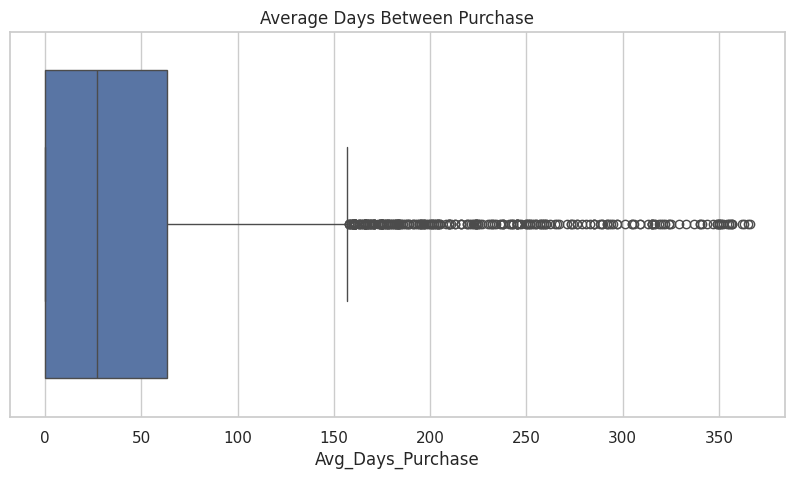

In [ ]:
fig = plt.figure(figsize = (10,5))
sns.boxplot(x=adp['Avg_Days_Purchase'])
plt.title('Average Days Between Purchase')
plt.show()

- There are so many outliers in the data of average number of days between purchase after 150.
- 75% of the customers makes the next purchase within 60 days.
- 50% of the customers makes the next purchase within 30 days.

# Insights

1. **Overview:**  
   The dataset spans **December 2010 to December 2011**, capturing **4371 customers** from **38 countries**. The store processed **23,798 orders** and sold **514,503 items**, generating **£9.73M in total sales**.  

2. **Country Analysis:**  
   - The **United Kingdom** dominates with **3950 customers** (~90%), contributing **£8.17M in sales** (84%) and accounting for 90% of the orders.  
   - The next highest sales come from the **Netherlands (£284.6K)**.  

3. **Product Analysis:**  
   - **WORLD WAR 2 GLIDERS ASSTD DESIGNS** is the **top-selling product**, followed by **JUMBO BAG RED RETROSPOT** and **POPCORN HOLDER**.  
   - The most-canceled product is **PAPER CRAFT, LITTLE BIRDIE** (~80K units got cancelled), followed by **MEDIUM CERAMIC TOP STORAGE JAR**.  

4. **Purchase Trends:**  
   - **December** (holiday shopping season) shows the highest sales, while sales dip in the **early months** and steadily rise again from **September to November**.  
   - Most sales occur between **9 AM and 4 PM**, peaking at **12 noon**.  
   - Sales are strongest in the **first 8 days of the month**, moderate during the middle, and lowest toward the end.  
   - **Thursday** sees the most sales, followed by **Wednesday** and **Tuesday**, while **Saturdays have no sales**, indicating the store is likely closed.  
   - By month, **November** leads in sales, followed by **December** and **October**.  

5. **Customer Analysis:**  
   - The most active customer (ID **14911**) made the highest number of purchases.  
   - The highest **Customer Lifetime Value (CLV)** belongs to ID **14646 (£280K)**, followed by IDs **18102 (£256K)** and **17450 (£187K)**.  

6. **Customer Segmentation (RFM Analysis):**  
   - The largest segments include **Hibernating (26.26%)** and **Can't Lose Them (14.92%)**.  
   - High-value segments: **Champions (7.41%)**, **Loyal Customers (13.93%)**, and **Potential Loyalists (10.8%)**.  
   - At-risk segments: **Lost Customers (6.25%)**, **About to Sleep (7.5%)**, and **Needs Attention (4.74%)**.  

7. **Customer Cohort Analysis:**  
   - **First-month retention rates** are higher for earlier cohorts like **December 2010 (38.19%)** and **January 2011 (40.62%)**, compared to newer cohorts like **June 2011 (20.85%)**.  
   - The **December 2010 cohort** shows long-term retention (~33%-39%), with a notable spike in **Month 11 (50%)**, possibly influenced by seasonal factors.  
   - Retention drops significantly between **Month 0 and Month 1**, with gradual tapering thereafter.  

8. **Purchase Intervals:**  
   - **75% of customers** repurchase within **60 days**, and **50% repurchase within 30 days**.  
   - There are significant outliers with intervals exceeding **150 days**, indicating inconsistent buying behavior among some customers.

# Recommendations

1. **Reward Your Best Customers (Champions)**:
 - Create **exclusive offers** and **VIP loyalty programs** for your **Champions** (7.41%) to maintain their loyalty. Offer them early access to new products, special discounts, or personalized services to ensure they keep coming back.

2. **Encourage Repeat Purchases from Loyal Customers**:
 - For **Loyal Customers** (13.93%), offer **personalized discounts**, **birthday rewards**, or **bonus loyalty points** to encourage repeat purchases and strengthen their relationship with your brand.

3. **Convert Potential Loyalists into Regulars**:
 - **Potential Loyalists** (10.8%) can be converted with targeted campaigns offering **time-limited discounts** or **exclusive previews**. These offers can help them make another purchase and become regular customers.

4. **Re-engage Lost Customers**:
 - **Lost Customers** (6.25%) haven't bought in a while. Use **re-engagement campaigns** with **special offers**, such as free shipping or a discount on their next order, to bring them back.

5. **Prevent Churn for At-Risk Customers**:
 - For **About to Sleep** (7.5%) and **Needs Attention** (4.74%) segments, create **urgent and personalized offers** to motivate them to make a purchase before they stop buying altogether.

6. **Revive Hibernating Customers**:
 - **Hibernating** customers (26.26%) have been inactive for a while. Send them **"We miss you" offers**, **exclusive discounts**, or special deals tailored to their previous interests to entice them to return.

7. **Utilize Email Campaigns for Different Segments**:
 - Send **segment-specific email campaigns** to engage each customer group effectively. For example, **Loyal Customers** might get loyalty bonuses, while **At-Risk** customers get discount reminders to encourage them to return.

8. **Optimize Your Loyalty Program**:
 - Design a **tiered loyalty program** that benefits **Loyal Customers** with better rewards, while encouraging **Hibernating** and **At-Risk** customers to return with easy-to-earn incentives.
   
9. **Expand Market Outside the UK**:
 - **Focus on key international markets**: While the UK dominates sales, consider expanding into markets like the **Netherlands** (which already shows good potential), and other **European** or **North American** regions with similar demographics. Tailor marketing campaigns to each region’s cultural preferences and seasonal buying behavior.
 - **Localized Promotions**: Create region-specific campaigns based on local holidays, trends, and language. For example, you could leverage the **Black Friday** season for **North America** and **Boxing Day** for **Canada**, mirroring successful strategies from the UK holiday season.

10. **Leverage Peak Sales Periods**:
 - **December** (holiday season) sees the highest sales. Plan **targeted campaigns** for all segments around this time. For example, offer **exclusive discounts** to **high-value customers** and **special promotions** for **new customers** or **first-time buyers** to maximize sales.

11. **Monitor Purchase Trends and Timing**:
 - Since sales peak between **9 AM and 4 PM**, especially around **12 PM**, optimize your store’s operations during these hours. Offer **flash sales** or **limited-time promotions** to increase conversion rates during peak hours.

12. **Product Strategy Based on Sales and Cancellations**:
 - Focus on promoting **top-selling products** like **World War 2 Gliders** and **Jumbo Bag Red Retrospot**, while addressing issues with **high-cancellation products** like **Paper Craft, Little Birdie**. Ensure better product descriptions, stock levels, and customer support for high-risk items.

13. **Segment-Based Marketing and Retargeting**:
 - Use **RFM data** to create **retargeting ads** on social media or through email. For example, show relevant ads to **Loyal Customers** about new products or exclusive deals, while targeting **Hibernating** customers with special offers to bring them back.